# EDA : CRIMES AGAINST WOMEN IN INDIA FROM 2001 TO 2021.
# I IMPORTED THIS DATA FROM KAGGLE BUT SAME  DATA ALSO AVAILABLE ON A GOVERNMENT WEBSITE DATA.GOV.IN.
# IT HAS STATE-WISE DATA ON THE VARIOUS CRIMES COMMITTED AGAINST WOMEN BETWEEN 2001 TO 2021. 
# CRIMES THAT ARE INCLUDE RAPE, KIDNAPPING AND ABDUCTION, DOWRY_DEATHS ETC.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

# IMPORTING DATASETS

In [40]:
data1=pd.read_csv(r"C:\Users\SHIVAM CHINDALIA\Downloads\excel data\CrimesOnWomenData.csv")

In [41]:
data1.head()

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [42]:
data1.shape

(736, 10)

In [43]:
data1.isnull().sum().sum() # no missing value present in our data.

0

In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


# NOW WE CLEAN OUR DATA.

In [45]:
data1.drop(columns=["Unnamed: 0"], axis=1 ,inplace= True)

In [46]:
# here i create a dic to rename columns or features.
columns_name={"Rape":"Rape cases",
            "K&A": "Kidnap and Assault",
             "DD":  "Dowry Deaths",
            "AoW": "Assault on Women",
            "AoM":  "Assault on Minors",
            "DV": "Domestic Violence",          
            "WT": "Witchcraft"
            }
# rename column in the dataset.
data1.rename(columns=columns_name, inplace= True)

In [47]:
# check rename columns
data1.columns

Index(['State', 'Year', 'Rape cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft'],
      dtype='object')

In [48]:
data1.describe()

,Year,Rape cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [49]:
data1["Year"].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [50]:
data1["State"].nunique() #there are 70 unique value in state column but we have only 28 state and 8 UT.

70

In [51]:
data1["State"].unique() # so we have duplicate data in this column state.

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D&N Haveli',
  

In [52]:
# remove the duplicate values in the col state
data1["State"]=data1["State"].str.upper()

In [53]:
# now checking unique value in state column
data1["State"].nunique() # 28+8=36, so there is an error

37

In [54]:
data1["State"]=data1["State"].replace("D&N HAVELI","D & N HAVELI")

In [55]:
data1["State"].unique()   

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA',
       'DELHI UT'], dtype=object)

# NOW OUR DATA IS CLEAN FOR FURTHER ANALYSIS. 

# FIRST WE SEE TREND OF CRIMES IN 21 YEARS.
# GROUP BY YEAR AND  SUM BY ALL THE CRIME TYPES

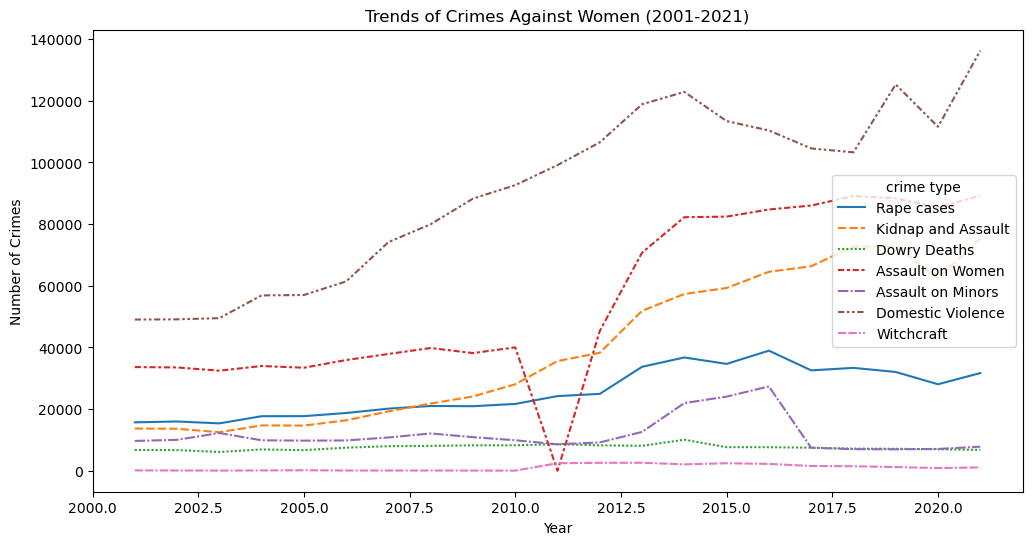

In [56]:
Crime_trend= data1.groupby("Year").sum()
# plotting the trend of different crimes over the years.
plt.figure(figsize=(12,6))
sns.lineplot(data=Crime_trend)
plt.title("Trends of Crimes Against Women (2001-2021)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend(title="crime type",loc="center right")
plt.show()

# observation : 
 # from the figure above its clear that domestic voilence increasing every year.

# TOP 10 STATES WITH HIGHEST NUMBER OF CRIME AGAINST WOMEN 

<Figure size 1200x1000 with 0 Axes>

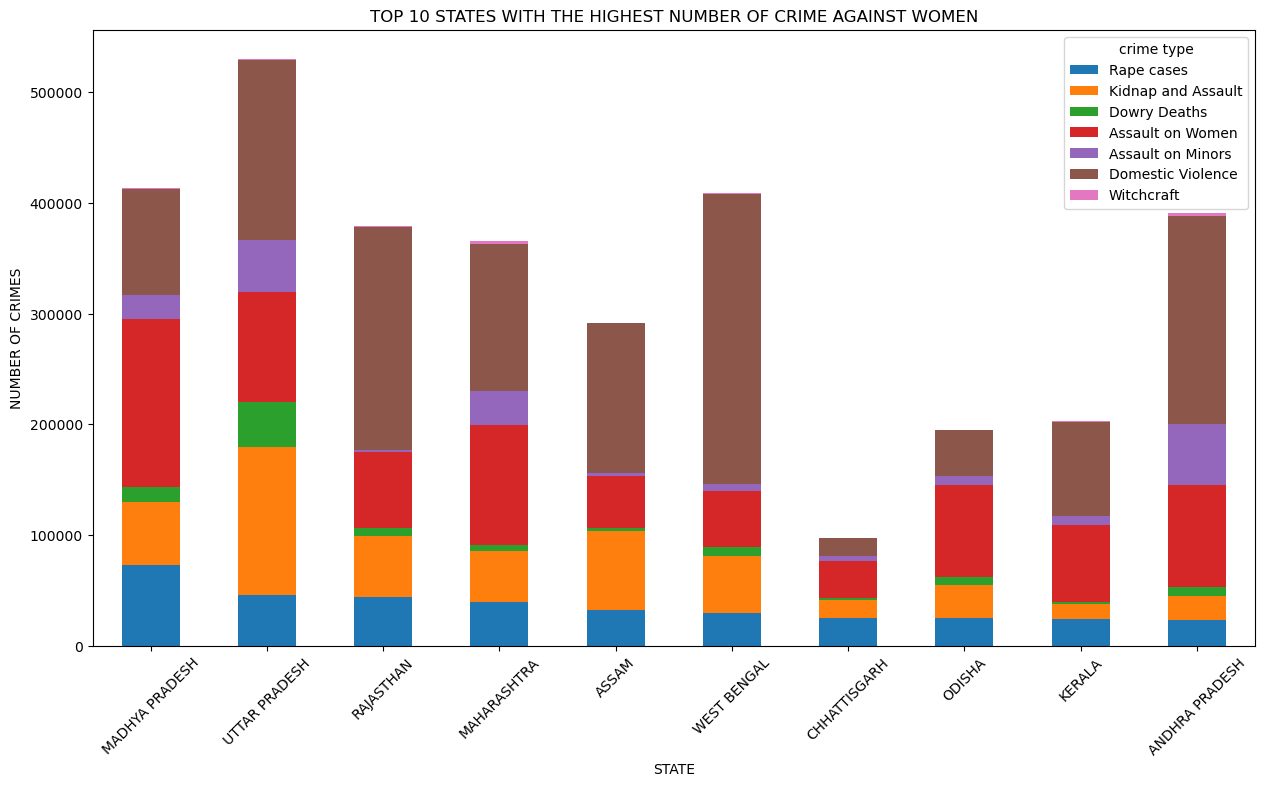

In [57]:
# total crimes by state
dropped_year=data1.drop(["Year"],axis=1)
State_crime=dropped_year.groupby("State").sum().sort_values(by="Rape cases", ascending=False)
# Top 10 state with the highest number of crimes
Top_states=State_crime.head(10)
plt.figure(figsize=(12,10))
Top_states.plot(kind="bar",figsize=(15,8),  stacked=True) # I use stacked = True for clear picture.
plt.title("TOP 10 STATES WITH THE HIGHEST NUMBER OF CRIME AGAINST WOMEN")
plt.xlabel("STATE")
plt.ylabel("NUMBER OF CRIMES")  
plt.xticks(rotation=45)
plt.legend(title="crime type",loc="upper right")
plt.show()

# SUM UP ALL CRIMES TO GET A SENSE OF DISTRIBUTION

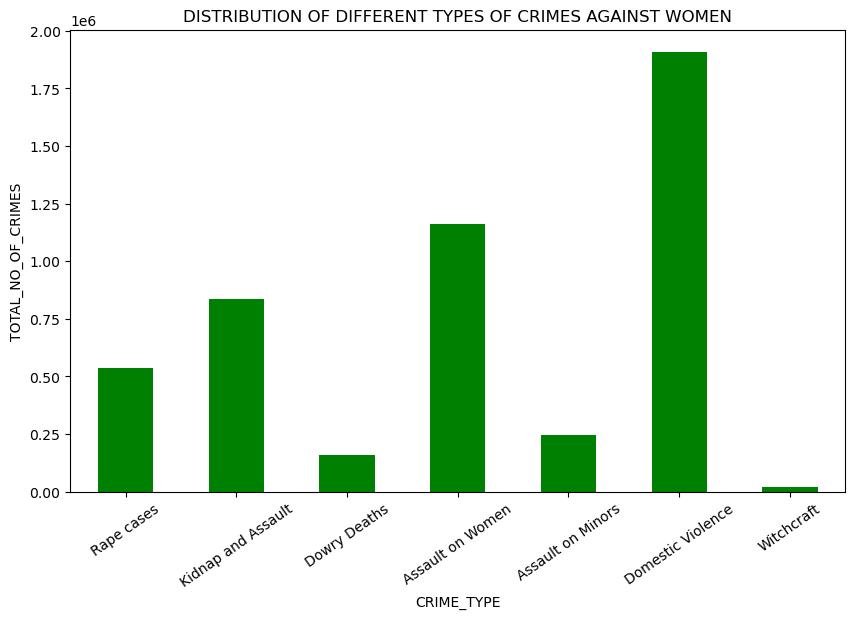

In [58]:
Crime_distribution=data1.drop(["State", "Year"], axis=1).sum()
plt.figure(figsize=(10,6))
Crime_distribution.plot(kind="bar", color="green")
plt.title("DISTRIBUTION OF DIFFERENT TYPES OF CRIMES AGAINST WOMEN")
plt.xlabel("CRIME_TYPE")
plt.ylabel("TOTAL_NO_OF_CRIMES")
plt.xticks(rotation=35)
plt.show()

# => observation:
# domestic violence and assault on women has high number of crimes

# calculate the average number of each crime type for the top 10 states with the highest total crime numbers

<Figure size 1000x900 with 0 Axes>

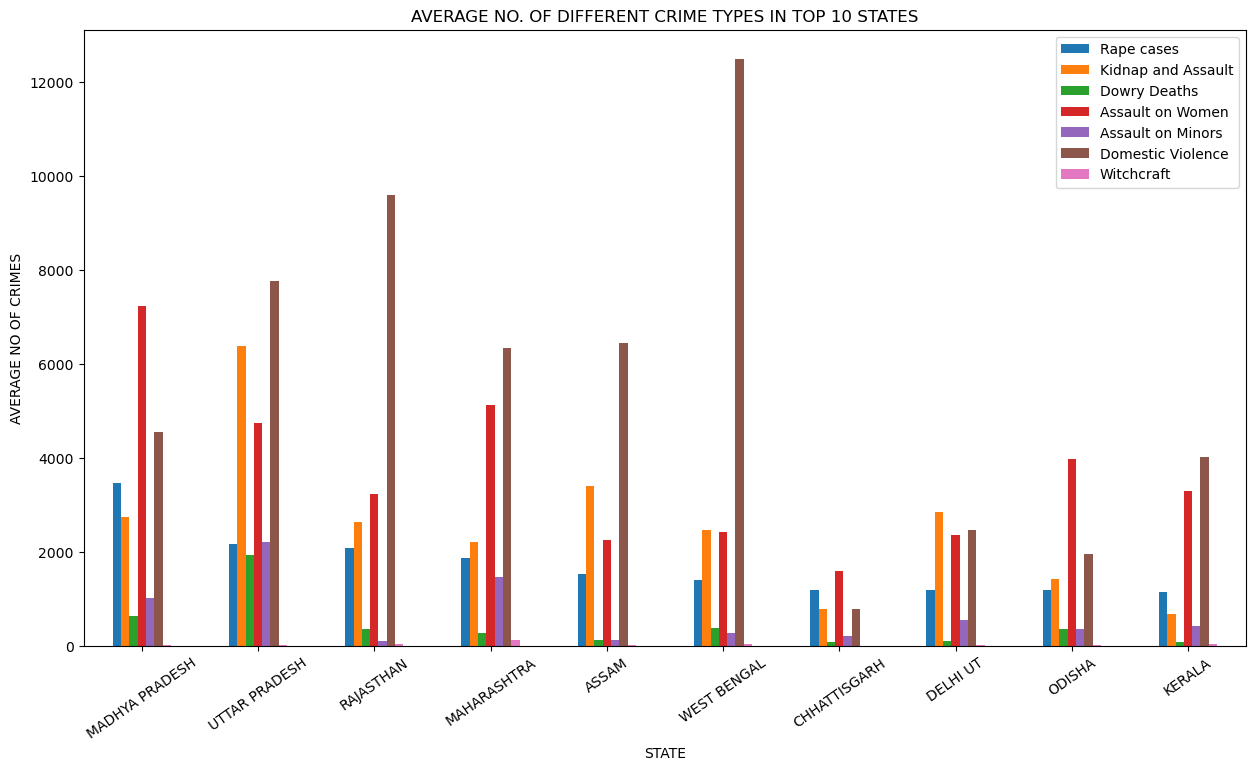

In [59]:
drop_year=data1.drop(["Year"], axis=1)
top_state_mean_crime=drop_year.groupby("State").mean().sort_values(by= "Rape cases",ascending=False).head(10)
plt.figure(figsize=(10,9))
top_state_mean_crime.plot(kind="bar", figsize=(15,8))
plt.title("AVERAGE NO. OF DIFFERENT CRIME TYPES IN TOP 10 STATES")
plt.xlabel("STATE")
plt.ylabel("AVERAGE NO OF CRIMES")
plt.xticks(rotation=35)
plt.show()

# observation:
  # the state west bengal has maximum number of domestic violence cases.

# NOW WE SEE STATE WISE RAPE CASES ONLY.
## GROUP BY STATE AND SUM BY ALL THE RAPE CASES.

<Figure size 3000x3000 with 0 Axes>

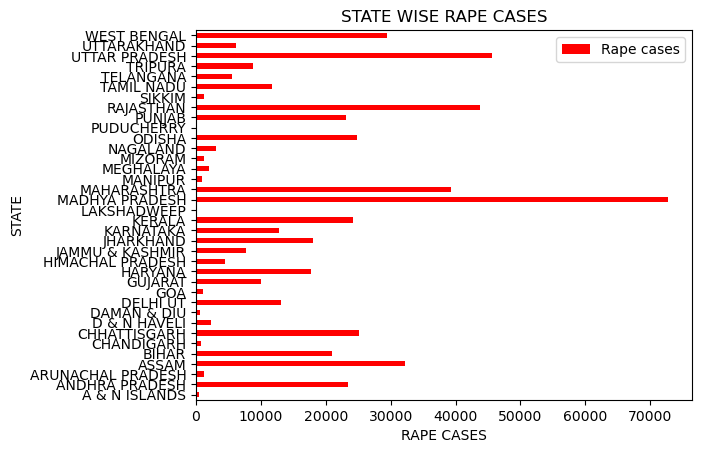

In [60]:
Statewise_Rapecases= data1.groupby("State").agg({"Rape cases" : "sum"})
plt.figure(figsize=(30,30))
Statewise_Rapecases.plot(kind="barh",color="red")
plt.title("STATE WISE RAPE CASES")
plt.xlabel("RAPE CASES")
plt.ylabel("STATE")
plt.show()


# observation: 
 # the state MP has high no. of rape cases.

# checking the crime rate of rape with respect to year.

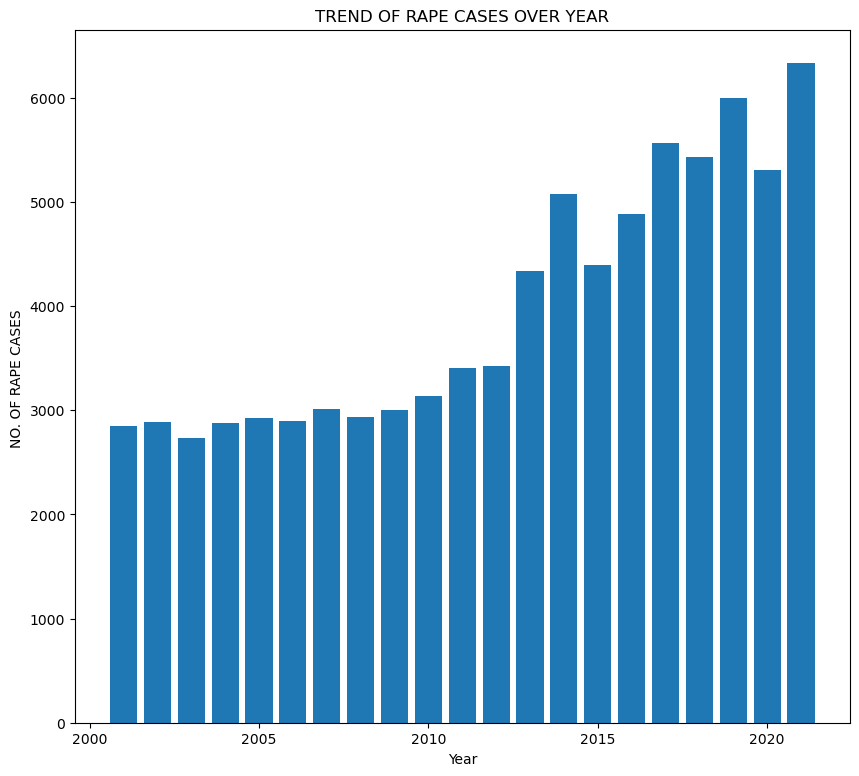

In [61]:
plt.figure(figsize=(10,9))
plt.bar(x="Year",data=data1, height="Rape cases")
plt.xlabel("Year")
plt.ylabel("NO. OF RAPE CASES ")
plt.title("TREND OF RAPE CASES OVER YEAR")
plt.show()

# observaion :
#  as per above figure no. of rape cases increse every year.

# first we check all cases in each year.
## then we check the trend of all crimes over years.

In [62]:
cases_in_each_year=data1.groupby("Year").sum()
cases_in_each_year.drop(columns=["State"],axis=1,inplace=True)

In [63]:
cases_in_each_year.head(5)

,Rape cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft
Year,,,,,,,
2001,15694,13681,6738,33622,9656,49032,114
2002,15970,13613,6687,33497,10027,49102,76
2003,15357,12499,6078,32450,12220,49492,46
2004,17682,14697,6900,33966,9871,56867,89
2005,17701,14644,6673,33413,9759,56995,148


In [64]:
cases_in_each_year["TOTAL_CRIMES"]= cases_in_each_year[['Rape cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft']].sum(axis=1)

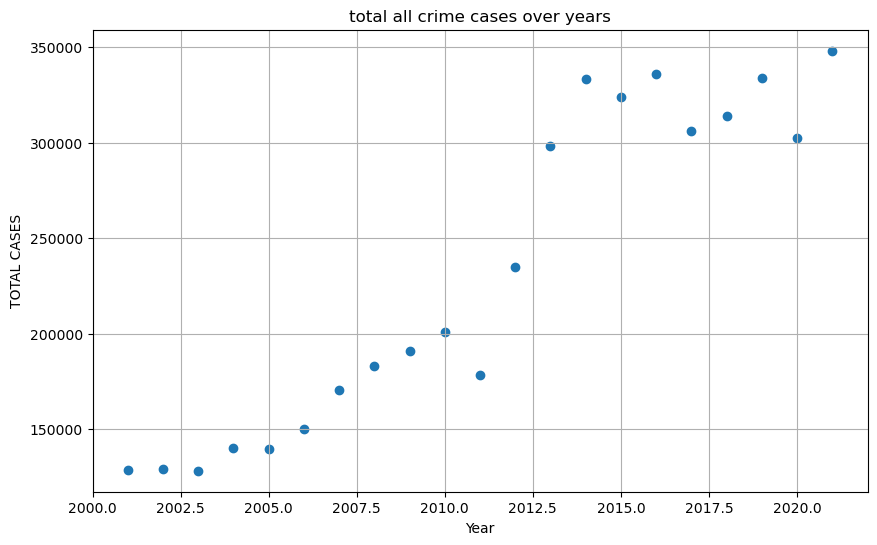

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(cases_in_each_year.index,cases_in_each_year["TOTAL_CRIMES"] )
plt.xlabel("Year")
plt.ylabel("TOTAL CASES")
plt.title("total all crime cases over years")
plt.grid(True)
plt.show()

# load the population data and mearge in data1

In [66]:
POPULATION_DATA=pd.read_csv(r"C:\Users\SHIVAM CHINDALIA\Downloads\state_wise_population.csv")


In [67]:
POPULATION_DATA.head()

,State,total_population
0,A & N ISLANDS,100608
1,ANDHRA PRADESH,18171615
2,ASSAM,1391154
3,BIHAR,6714516
4,CHANDIGARH,960787


In [68]:
data1=pd.merge(data1,POPULATION_DATA,on="State")

In [69]:
data1.head()

,State,Year,Rape cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft,total_population
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,18171615
1,ANDHRA PRADESH,2002,1002,854,449,3799,2024,7018,0,18171615
2,ANDHRA PRADESH,2003,946,931,466,4128,2286,8167,5,18171615
3,ANDHRA PRADESH,2004,1016,1030,512,3817,2310,8388,2,18171615
4,ANDHRA PRADESH,2005,935,995,443,3595,2508,8696,3,18171615


In [70]:
data1['total crimes'] = data1[[ 'Rape cases', 'Kidnap and Assault', 'Dowry Deaths',
       'Assault on Women', 'Assault on Minors', 'Domestic Violence',
       'Witchcraft']].sum(axis=1)

# Calculate the crime rate

In [71]:
data1['crime rate'] = (data1['total crimes'] / data1['total_population']) * 100000

In [72]:
data1.head(10)


,State,Year,Rape cases,Kidnap and Assault,Dowry Deaths,Assault on Women,Assault on Minors,Domestic Violence,Witchcraft,total_population,total crimes,crime rate
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,18171615,13669,75.221713
1,ANDHRA PRADESH,2002,1002,854,449,3799,2024,7018,0,18171615,15146,83.349774
2,ANDHRA PRADESH,2003,946,931,466,4128,2286,8167,5,18171615,16929,93.161780
3,ANDHRA PRADESH,2004,1016,1030,512,3817,2310,8388,2,18171615,17075,93.965231
4,ANDHRA PRADESH,2005,935,995,443,3595,2508,8696,3,18171615,17175,94.515540
5,ANDHRA PRADESH,2006,1049,1329,519,4534,2411,9164,0,18171615,19006,104.591694
6,ANDHRA PRADESH,2007,1070,1564,613,4406,3316,11335,0,18171615,22304,122.740879
7,ANDHRA PRADESH,2008,1257,1396,556,4730,3551,10306,0,18171615,21796,119.945310
8,ANDHRA PRADESH,2009,1188,1526,546,5147,3520,11297,0,18171615,23224,127.803720
9,ANDHRA PRADESH,2010,1362,1531,588,4634,4562,12080,0,18171615,24757,136.239954


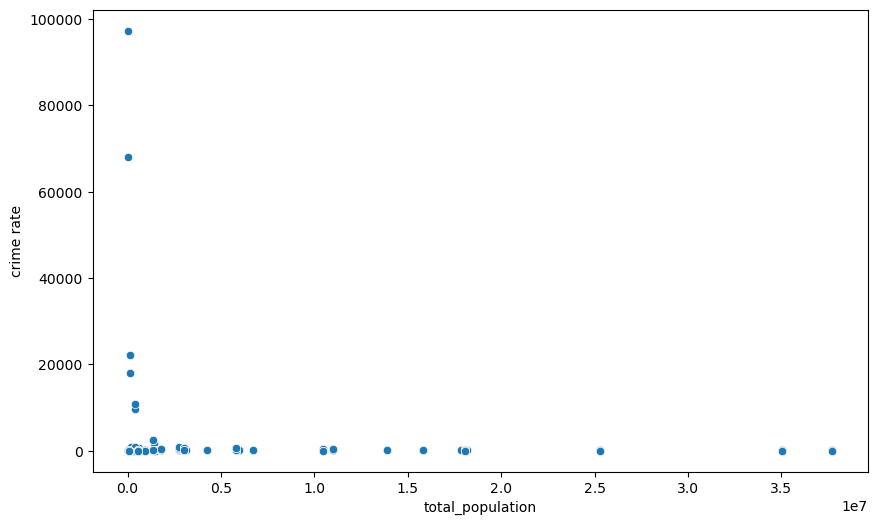

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="total_population",y="crime rate", data=data1)
plt.show()

# assume: There is no significant difference in the number of crimes against women across different states.to make this statement correct.
# We are doing hypothesis testing 
# we perform anova test.

In [74]:
grouped_data = data1.groupby('State')['crime rate'].apply(list)
f_statistic, p_value = stats.f_oneway(*grouped_data)
print('F-statistic:', f_statistic)
print('p-value:', p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in crimes against women across states.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")


F-statistic: 1.9818300098807247
p-value: 0.0011752107553656761
Reject the null hypothesis: There is a significant difference in crimes against women across states.


In [ ]:
## iske aagee kyaaaaa kruuuu 